# Problem 1: Shattering and VC Dimension

## 1) T($a+bx_1$)

This classifer is a vertical line in $x_1,x_2$ space. It is clear that such a classifer can only shatter (a) and (b).

## 2) T($a + bx_1 + cx_2$)

This classifer can shatter (a), (b) and (c).

(d) cannot be shattered. Consider the case where $\{(2,2),(8,6)\}$ belong to class 0 and $\{(6,4), (4,8)\}$ belong to class 1 - no line can separate the two classes in this case.

## 3) T($(x_1-a)^2 + (x_2-b)^2 + c$)  

The decision boundary in this case is a circle. We may choose the radius and center of this circle by varying the parameters.

Such a decision boundary can clearly shatter (a), (b), and (c). 

I claim that it cannot shatter (d). Let us say that our classifier classifies everything inside the circle as class 0, and everything outside as class 1. In the scenario where $\{(2,2),(8,6)\}$ belong to class 0 and $\{(6,4), (4,8)\}$ belong to class 1, no circle can be drawn such that the class 0 points are on the inside and the class 1 points are on the outside.

Therefore, this classifier cannot shatter (d)


# Problem #2: Decision Trees for Spam Classification

## Part 1 Calculate the entropy H(y) of the binary class variable y.

In [1]:
import numpy as np

In [16]:
nRed = 7.
nBlue = 10.
N = nRed + nBlue
ent = (nRed / N)*np.log2(1/(nRed/N)) + (nBlue / N)*np.log2(1/(nBlue/N))
print(ent)

0.9774178175281716


In [14]:
np.log?

# Problem #3: Decision Trees on Kaggle

### Part 1

In [42]:
import mltools as ml
import numpy as np
from matplotlib import pyplot as plt

In [22]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [23]:
print(X.shape)
print(Y.shape)

(200000, 14)
(200000,)


In [26]:
print('Mins: ' + str(X.min(axis=0)))
print('Maxs: ' + str(X.max(axis=0)))
print('Vars: ' + str(X.var(axis=0)))

Mins: [ 1.9350e+02  1.5250e+02  2.1425e+02  1.5250e+02  1.0000e+01  0.0000e+00
  0.0000e+00  0.0000e+00  8.7589e-01  0.0000e+00  0.0000e+00  0.0000e+00
  9.9049e-01 -9.9990e+02]
Maxs: [2.5300e+02 2.4900e+02 2.5250e+02 2.5250e+02 3.1048e+04 1.3630e+04
 9.2380e+03 1.2517e+02 1.9167e+01 1.3230e+01 6.6761e+01 7.3902e+01
 9.7504e+02 7.9720e+02]
Vars: [8.34991711e+01 9.26255931e+01 3.52863398e+01 9.76257317e+01
 1.56515138e+07 3.08176182e+06 4.43951746e+05 8.21948502e+00
 6.40504819e+00 4.36344047e+00 4.08637188e+00 2.19877847e+00
 4.04646245e+02 3.40652055e+03]


### Part 2

In [30]:
Xtr, Ytr = X[:10000,:], Y[:10000]
Xva, Yva = X[10000:20000,:], Y[10000:20000]

In [31]:
print(Xtr.shape)
print(Ytr.shape)
print(Xva.shape)
print(Yva.shape)

(10000, 14)
(10000,)
(10000, 14)
(10000,)


In [32]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)

In [35]:
train_error = learner.err(Xtr,Ytr)
print('training error: %f' % train_error)

training error: 0.007400


In [36]:
val_error = learner.err(Xva, Yva)
print('validation error: %f' % val_error)

validation error: 0.383000


### Part 3

In [47]:
train_errors = []
val_errors = []
for k in range(16):
    learner_k = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=k)
    train_errors.append(learner_k.err(Xtr, Ytr))
    val_errors.append(learner_k.err(Xva, Yva))

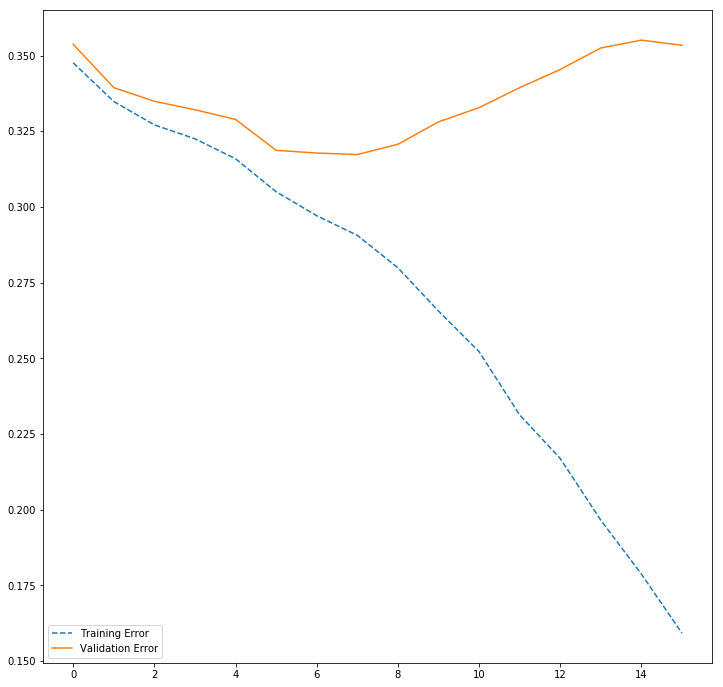

In [48]:
plt.figure(figsize=(12,12))
plt.plot(train_errors, '--', label="Training Error")
plt.plot(val_errors, '-', label="Validation Error" )
plt.legend()

Comments:

Higher maxDepth corresponds to higher model complexity. Based on the graph above, the best model is as a maxDepth of roughly 6

### Part 4

In [49]:
maxDepth = 50
minParents = [2**k for k in range(2, 13)]
train_errors_minParents = []
val_errors_minParents = []
for m in minParents:
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=m ,maxDepth=maxDepth)
    train_errors_minParents.append(learner.err(Xtr, Ytr))
    val_errors_minParents.append(learner.err(Xva, Yva))    

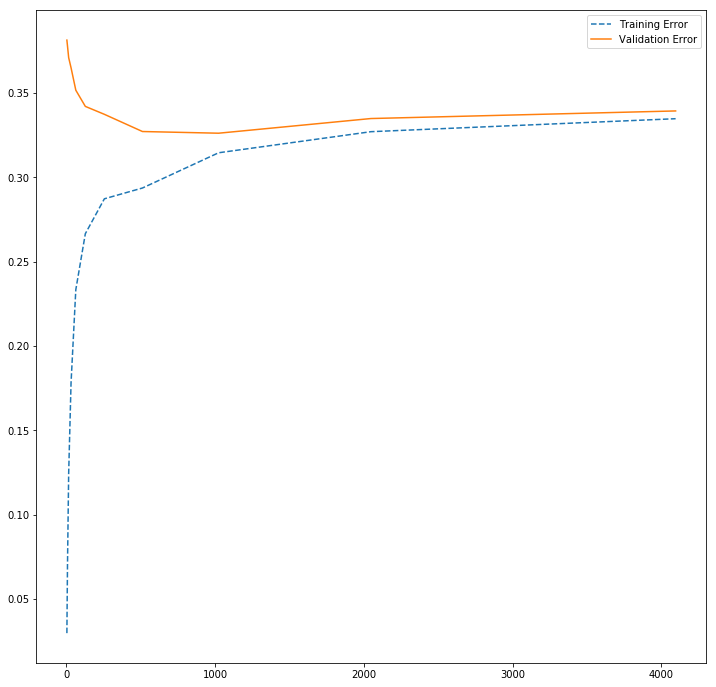

In [50]:
plt.figure(figsize=(12,12))
plt.plot(minParents, train_errors_minParents, '--', label="Training Error")
plt.plot(minParents, val_errors_minParents, '-', label="Validation Error" )
plt.legend()

Comments:

Models with higher minParent have lower complexity (which makes sense because higher minParent requires more data to split the tree). 

Based on the above plot, minParent = 1024 provides the best decision tree model.

### Part 5

In [68]:
maxDepth = 6  # best maxDepth from earlier
minParent = 1024  # best maxParent from earlier

learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=minParent, maxDepth=maxDepth)

#### ROC

In [70]:
roc_tr = learner.roc(Xtr, Ytr)
roc_val = learner.roc(Xva, Yva)
print("Training ROC: " + str(roc_tr))
print('\n')
print("Validation ROC: " + str(roc_val))

Training ROC: (array([0.        , 0.00183936, 0.01824034, 0.03004292, 0.13044145,
       0.14301042, 0.17581239, 0.24110975, 0.41063765, 0.42979767,
       0.51302882, 0.62093807, 0.69911097, 0.73191294, 0.75613121,
       0.86879215, 0.99233599, 0.9992336 , 1.        ]), array([0.        , 0.0132336 , 0.06990794, 0.10730725, 0.33371692,
       0.35989643, 0.40880322, 0.49252014, 0.65391254, 0.67088608,
       0.73130035, 0.81530495, 0.86708861, 0.88406214, 0.89873418,
       0.95454545, 0.99856157, 1.        , 1.        ]), array([1.00000000e+00, 9.98313918e-01, 9.81912937e-01, 9.70110362e-01,
       8.69711833e-01, 8.57142857e-01, 8.24187615e-01, 7.59043532e-01,
       5.89515635e-01, 5.70202330e-01, 4.86971183e-01, 3.79215205e-01,
       3.01042305e-01, 2.68240343e-01, 2.44022072e-01, 1.31207848e-01,
       7.81729001e-03, 9.19681177e-04, 1.53280196e-04]))


Validation ROC: (array([0.        , 0.00278508, 0.02073341, 0.03481355, 0.12888751,
       0.14219403, 0.17143741, 0.23301872,

#### AUC

In [71]:
print("Training AUC: %f" % learner.auc(Xtr, Ytr))
print("Validation AUC: %f" % learner.auc(Xva, Yva))

Training AUC: 0.672665
Validation AUC: 0.650589


### Part 6

We now train the decision tree model from part 5 on all training data

In [74]:
learner = ml.dtree.treeClassify(X, Y, minParent=minParent, maxDepth=maxDepth)

In [75]:
learner.err(X,Y)

0.305515

Now make predictions on the test data

In [77]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y _ submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')